In [552]:
#importando modulos

#Manipulação
import pandas as pd

#Visualizador
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Algebra
import numpy as np

#Algoritimo de Machine Learning
from sklearn.ensemble import RandomForestClassifier


In [553]:
#carregando dados
dt = pd.read_csv("train.csv")
ds = pd.read_csv("test.csv")

In [554]:
#ver formato
dt.shape

(891, 12)

In [555]:
#ver 5 primeiras linhas
dt.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [556]:
#verificando nulos
dt.isnull().values.any()

True

In [557]:
#Visualizar todos os dados
#dt = open('test.csv', 'r')
#dados = dt.read()
#print(dados)

In [558]:
#Correlação entre as variaveis

def plot_corr(dt,size=12):
    corr = dt.corr()
    fig, ax = plt.subplots(figsize=(size, size,))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    sns.set(style="white")


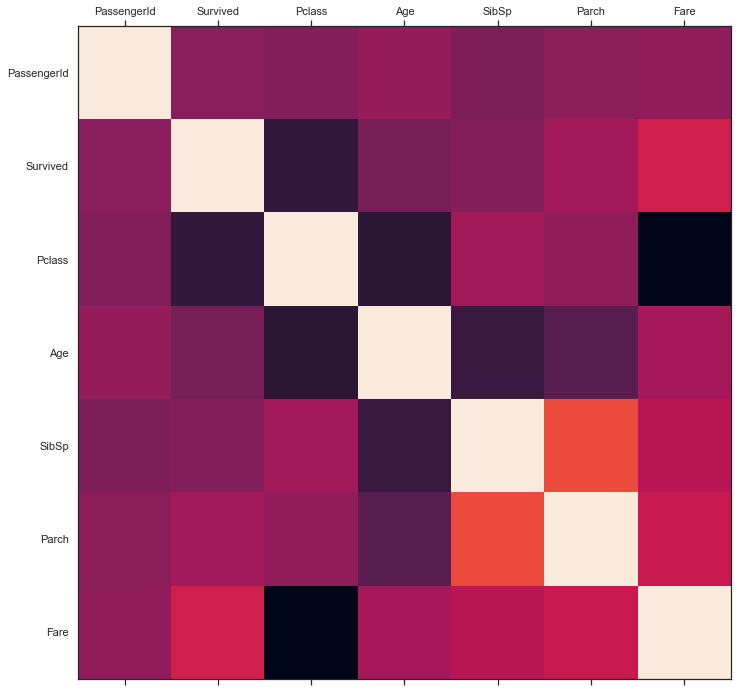

In [559]:
#vendo a correlação com grafico onde o mais claro é 1 e o mais escuro é mais distante de 1 sendo branco mais claro
plot_corr(dt)

In [560]:
#vendo a correlação e enquanto mais perto de 1 melhor a corelação
dt.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [561]:
#Apagando as Colunas não utilizadas
dt.drop(['Ticket','Name','PassengerId','Cabin'], axis=1, inplace= True)
ds.drop(['Ticket','Name','PassengerId','Cabin'], axis=1, inplace= True)
dt.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [562]:
#Alterando o nome das colunas para facilitar a visualização
dt.columns = ['Sobreviveu', 'Classe', 'Sexo', 'Idade', 'Parente', 'Pai/Crianca','Tarifa','Embarque']
ds.columns = ['Classe', 'Sexo', 'Idade', 'Parente', 'Pai/Crianca','Tarifa','Embarque']
dt.head(10)

,Sobreviveu,Classe,Sexo,Idade,Parente,Pai/Crianca,Tarifa,Embarque
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [563]:
#Para analisar a quantidade minima ,maxima, media e porcentagem de cada coluna
dt.describe()

,Sobreviveu,Classe,Idade,Parente,Pai/Crianca,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


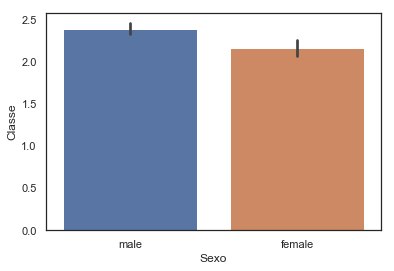

In [564]:
# Grafico com Idade e Sexo
#dt.info()
sns.barplot(x='Sexo', y='Classe', data=dt)

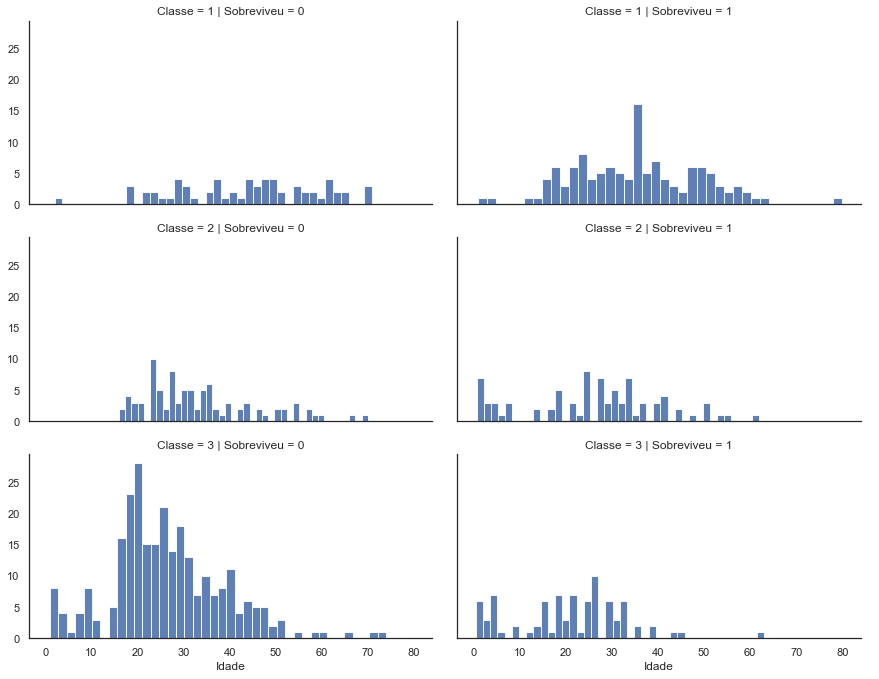

In [565]:
#Analisando os Sobreviventes por Classe e Sexo
graf = sns.FacetGrid(dt, col='Sobreviveu', row='Classe', height=3.2, aspect=1.9)
graf.map(plt.hist, 'Idade', alpha=.9, bins=40)
graf.add_legend();

C:\Users\robson\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


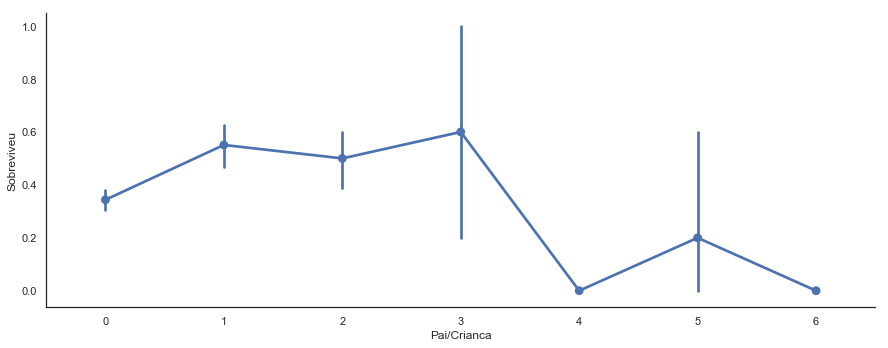

In [566]:
#Com essa analise vemos que as pessoas da classe 3 provavelmente não sobreviveram
parentes = sns.factorplot('Pai/Crianca','Sobreviveu', 
                      data=dt, aspect = 2.5, )

In [573]:
#Subistituindo os valores 0 em idade pela mádia
#Troca na coluna idade NaN pela media da idade, pra não atrapalhar nos calculos
dt['Idade'].fillna(29, inplace = True)
#dt['Sexo'] = dt['Sexo'].replace(['male','female'],['0','1'])
#dt['Embarque'] = dt['Embarque'].replace(['S','C','Q'],['0','1','2'])
ds['Idade'].fillna(29, inplace = True)
#ds['Sexo'] = dt['Sexo'].replace(['male','female'],['0','1'])
#ds['Embarque'] = dt['Embarque'].replace(['S','C','Q'],['0','1','2'])
ds['Idade'] = np.dtype('int64').type(ds['Idade'])
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Sobreviveu     891 non-null int64
Classe         891 non-null int64
Sexo           891 non-null int64
Idade          891 non-null int32
Parente        891 non-null int64
Pai/Crianca    891 non-null int64
Tarifa         891 non-null int32
Embarque       889 non-null float64
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.8 KB


In [568]:
# Parametro o quantidade de dados por Idade
data = [dt, ds]
for dataset in data:
    dataset['Idade'] = dataset['Idade'].astype(int)
    dataset.loc[ dataset['Idade'] <= 17, 'Idade'] = 0
    dataset.loc[(dataset['Idade'] > 17) & (dataset['Idade'] <= 22), 'Idade'] = 1
    dataset.loc[(dataset['Idade'] > 22) & (dataset['Idade'] <= 28), 'Idade'] = 2
    dataset.loc[(dataset['Idade'] > 28) & (dataset['Idade'] <= 29), 'Idade'] = 3
    dataset.loc[(dataset['Idade'] > 29) & (dataset['Idade'] <= 40), 'Idade'] = 4
    dataset.loc[ dataset['Idade'] > 40, 'Idade'] = 5
    #dt['Idade'].value_counts()

In [569]:
# Remodelando dados de Tarifa
data = [dt, ds]

for dataset in data:
    dataset['Tarifa'] = dataset['Tarifa'].fillna(0)
    dataset['Tarifa'] = dataset['Tarifa'].astype(int)
    
#Alterando Formato do Sexo
gs = {"male": 0, "female": 1}
data = [dt, ds]

for dataset in data:
    dataset['Sexo'] = dataset['Sexo'].map(gs)

#Alterando Formato Embarque 
gs = {"S": 0, "C": 1,"Q":2}
data = [dt, ds]

for dataset in data:
    dataset['Embarque'] = dataset['Embarque'].map(gs)
    
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Sobreviveu     891 non-null int64
Classe         891 non-null int64
Sexo           891 non-null int64
Idade          891 non-null int32
Parente        891 non-null int64
Pai/Crianca    891 non-null int64
Tarifa         891 non-null int32
Embarque       889 non-null float64
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.8 KB


In [506]:
# Parametro o quantidade de dados por grupo
data = [dt, ds]

for dataset in data:
    dataset.loc[ dataset['Tarifa'] <= 7.91, 'Tarifa'] = 0
    dataset.loc[(dataset['Tarifa'] > 7.91) & (dataset['Tarifa'] <= 14.454), 'Tarifa'] = 1
    dataset.loc[(dataset['Tarifa'] > 14.454) & (dataset['Tarifa'] <= 31), 'Tarifa']   = 2
    dataset.loc[(dataset['Tarifa'] > 31) & (dataset['Tarifa'] <= 99), 'Tarifa']   = 3
    dataset.loc[(dataset['Tarifa'] > 99) & (dataset['Tarifa'] <= 250), 'Tarifa']   = 4
    dataset.loc[ dataset['Tarifa'] > 250, 'Tarifa'] = 5
    dataset['Tarifa'] = dataset['Tarifa'].astype(int)

In [507]:
#Parametro de Idade por Classe
data = [dt, ds]
for dataset in data:
    dataset['I-C']= dataset['Idade']* dataset['Classe']
#Parametro de Tarifa por Pessoa
for dataset in data:
    dataset['Tar-P'] = dataset['Tarifa']/(dataset['Pai/Crianca']+1)
    dataset['Tar-P'] = dataset['Tar-P'].astype(int)
dt.head(20)

,Sobreviveu,Classe,Sexo,Idade,Parente,Pai/Crianca,Tarifa,Embarque,I-C,Tar-P
0,0,3,0,1,1,0,0,0,3,0
1,1,1,1,4,1,0,3,1,4,3
2,1,3,1,2,0,0,0,0,6,0
3,1,1,1,4,1,0,3,0,4,3
4,0,3,0,4,0,0,1,0,12,1
5,0,3,0,3,0,0,1,2,9,1
6,0,1,0,5,0,0,3,0,5,3
7,0,3,0,0,3,1,2,0,0,1
8,1,3,1,2,0,2,1,0,6,0
9,1,2,1,0,1,0,2,1,0,2


In [549]:
X_train = dt.drop("Sobreviveu", axis=1)
Y_train = dt["Sobreviveu"]
#X_test  = ds.drop("Sobreviveu", axis=1).copy()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Sobreviveu     891 non-null int64
Classe         891 non-null int64
Sexo           891 non-null int64
Idade          891 non-null int32
Parente        891 non-null int64
Pai/Crianca    891 non-null int64
Tarifa         891 non-null int32
Embarque       889 non-null float64
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.8 KB


In [550]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').